In [9]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [10]:
def strdate_to_floatdate(data):
#Funcion para convertir los indices de fecha en str a indices en float considerando la unidad el año y como decimales los meses (mes/12) y los dias (dias/30)
    return int(data[0:4])+int(data[5:7])/120+int(data[8:10])/3000

def regression_tree(indice,data,params):
    centroides_k6=[]
    for i in range(indice.shape[0]): 
        centroides_k6.append(data[indice.iloc[i,:][0]])
    
        cluster=[]
    for i in range(len(centroides_k6)):
        X=np.array(centroides_k6[i].index)
        X=np.array(list(map(strdate_to_floatdate,X)))
        X=X.reshape(-1, 1)
        Y=np.array(centroides_k6[i].values)
        X_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
        clf= DecisionTreeRegressor(max_depth=params).fit(X_train,y_train)
    
        tupla=(X_train, x_test, y_train, y_test,clf)
        cluster.append(tupla)
    return cluster

In [11]:

#cargamos los datos de entrada
indice = pd.read_csv("KMEAN_Centroides6K_V1.csv",index_col=[0])
data = pd.read_csv("Matriz_precios_back.csv",index_col=[0])
#veamos cuantas dimensiones y registros contiene
print("Dimensiones de los datos: {}".format(data.shape))
print("Dimensiones del indice : {}".format(indice.shape))



Dimensiones de los datos: (107, 560)
Dimensiones del indice : (6, 1)


In [12]:

def analisis_production_cost(cluster,ix):
    # arange for creating a range of values
    # from min value of X to max value of X
    # with a difference of 0.01 between two
    # consecutive values
    X_grid = np.arange(min(cluster[ix][1]), max(cluster[ix][1]), 0.01)

    # reshape for reshaping the data into
    # a len(X_grid)*1 array, i.e. to make
    # a column out of the X_grid values
    X_grid = X_grid.reshape((len(X_grid), 1))

    # scatter plot for original data
    plt.scatter(cluster[ix][1], cluster[ix][3], color = 'red')

    # plot predicted data
    plt.plot(X_grid, cluster[ix][4].predict(X_grid), color = 'blue')

    # specify title
    plt.title('Profit to Production Cost (Decision Tree Regression)')

    # specify X axis label
    plt.xlabel('Production Cost')

    # specify Y axis label
    plt.ylabel('Profit')

    # show the plot
    plt.show()

    # REALIZAMOS METRICAS CON r2 y ERROR MEDIO CUADRATICO
def error_metrics(cluster,ix):
    Y_predicted=cluster[ix][4].predict(cluster[ix][1])
    sq_err=mean_squared_error(cluster[ix][3], Y_predicted, squared=True)
    print("--"*5)
    print("Error Cuadratico del cluster {} es {}".format(ix,sq_err))
    r2=r2_score(cluster[ix][3], Y_predicted)
    print("El valor de r2 del cluster {} es {}".format(ix,r2))

In [13]:
def analisis_completo(indice,data,params):
    
    cluster=regression_tree(indice,data,params)

    for i in range(5):
        analisis_production_cost(cluster,i)
        error_metrics(cluster,i)


## REGRESSION TREE DEPTH = 2

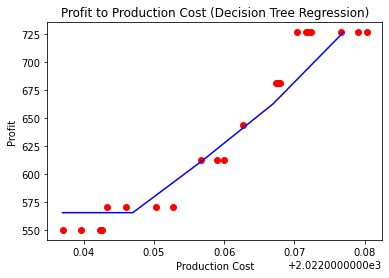

----------
Error Cuadratico del cluster 0 es 226.2379868101405
El valor de r2 del cluster 0 es 0.9554152864493483


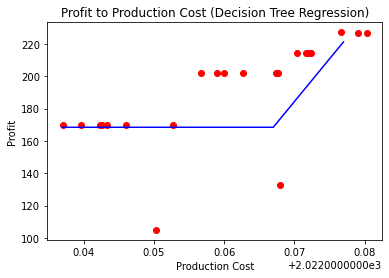

----------
Error Cuadratico del cluster 1 es 1744.772746705714
El valor de r2 del cluster 1 es -0.8623935356751053


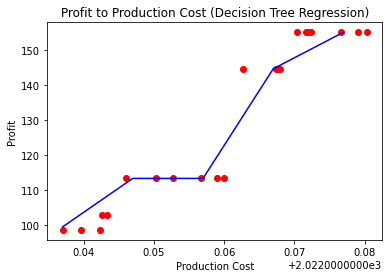

----------
Error Cuadratico del cluster 2 es 49.790553454545396
El valor de r2 del cluster 2 es 0.9027327841743633


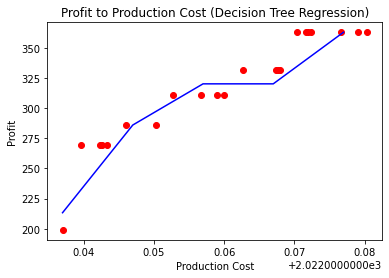

----------
Error Cuadratico del cluster 3 es 645.8498404040403
El valor de r2 del cluster 3 es 0.6510551175697693


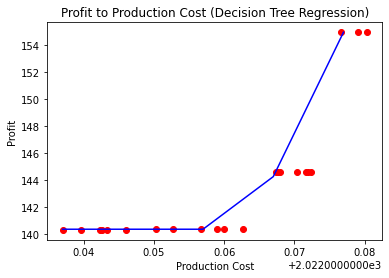

----------
Error Cuadratico del cluster 4 es 0.031722677933958825
El valor de r2 del cluster 4 es 0.9986584871001758


In [14]:
analisis_completo(indice,data,2)

## REGRESSION TREE DEPTH=3

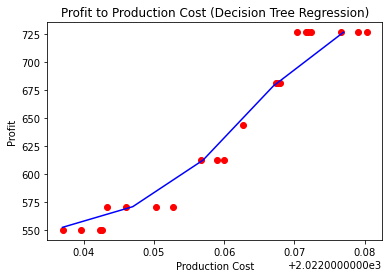

----------
Error Cuadratico del cluster 0 es 84.83734739497818
El valor de r2 del cluster 0 es 0.9832811063900755


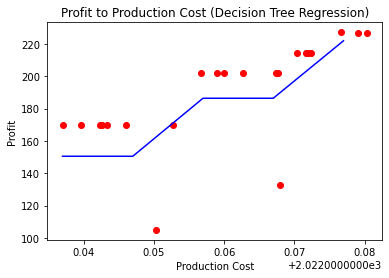

----------
Error Cuadratico del cluster 1 es 1602.573540701299
El valor de r2 del cluster 1 es -0.7106082200569084


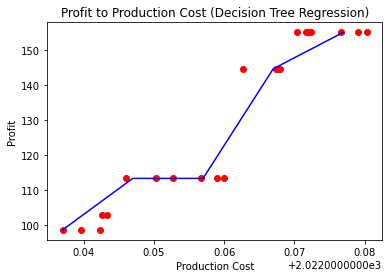

----------
Error Cuadratico del cluster 2 es 49.621909090909114
El valor de r2 del cluster 2 es 0.9030622355778422


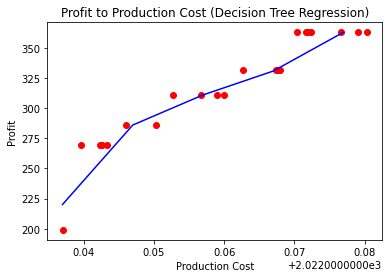

----------
Error Cuadratico del cluster 3 es 770.2858013297471
El valor de r2 del cluster 3 es 0.5838238680766217


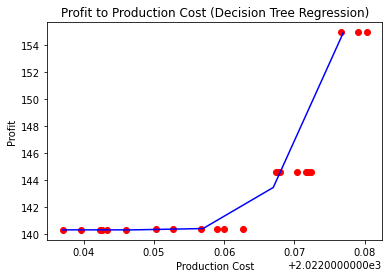

----------
Error Cuadratico del cluster 4 es 0.00042327272727236666
El valor de r2 del cluster 4 es 0.9999821003187385


In [15]:
analisis_completo(indice,data,3)

## REGRESSION TREE DEPTH=4

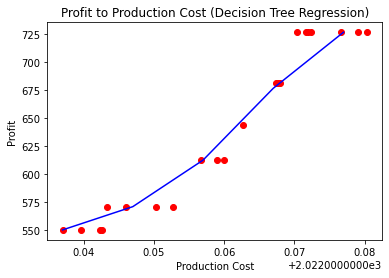

----------
Error Cuadratico del cluster 0 es 86.17833333333405
El valor de r2 del cluster 0 es 0.9830168383297907


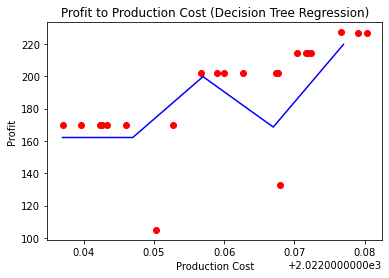

----------
Error Cuadratico del cluster 1 es 1418.1206791702928
El valor de r2 del cluster 1 es -0.5137207929689254


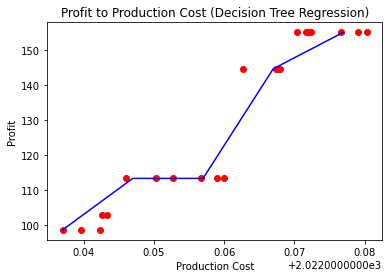

----------
Error Cuadratico del cluster 2 es 49.98852727272729
El valor de r2 del cluster 2 es 0.902346036874627


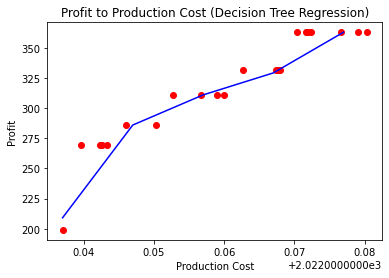

----------
Error Cuadratico del cluster 3 es 639.9264547713875
El valor de r2 del cluster 3 es 0.6542554514149892


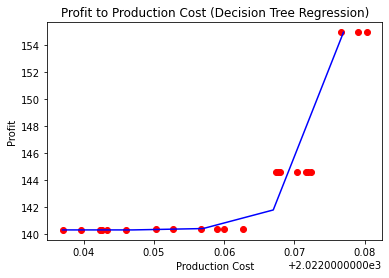

----------
Error Cuadratico del cluster 4 es 0.0004545454545451445
El valor de r2 del cluster 4 es 0.9999807778336968


In [16]:
analisis_completo(indice,data,4)

## REGRESSION TREE DEPTH=5

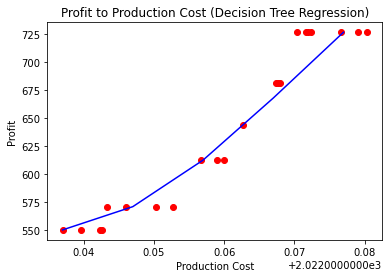

----------
Error Cuadratico del cluster 0 es 83.57818181818253
El valor de r2 del cluster 0 es 0.983529250114062


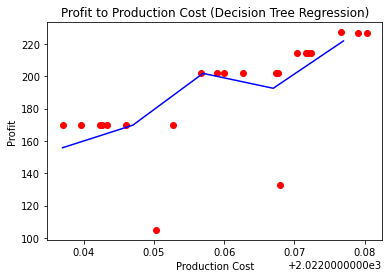

----------
Error Cuadratico del cluster 1 es 1415.9076264378482
El valor de r2 del cluster 1 es -0.51135855117509


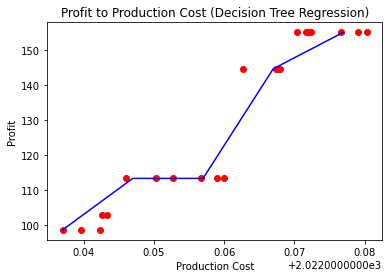

----------
Error Cuadratico del cluster 2 es 49.98852727272729
El valor de r2 del cluster 2 es 0.902346036874627


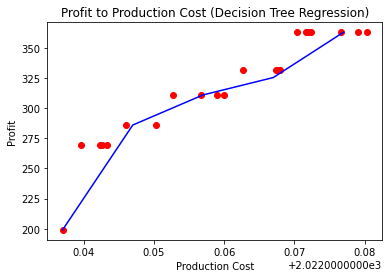

----------
Error Cuadratico del cluster 3 es 644.1409454545457
El valor de r2 del cluster 3 es 0.6519784129086115


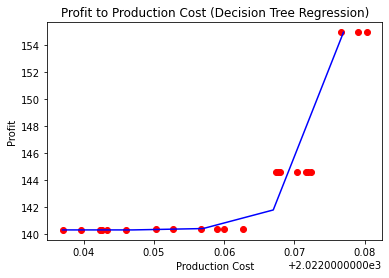

----------
Error Cuadratico del cluster 4 es 0.0004545454545451445
El valor de r2 del cluster 4 es 0.9999807778336968


In [17]:
analisis_completo(indice,data,5)

## REGRESSION TREE DEPTH=6

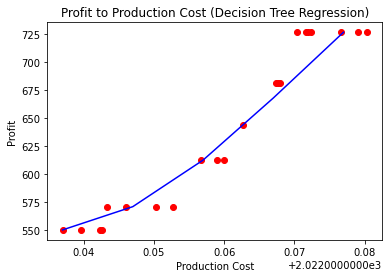

----------
Error Cuadratico del cluster 0 es 83.57818181818253
El valor de r2 del cluster 0 es 0.983529250114062


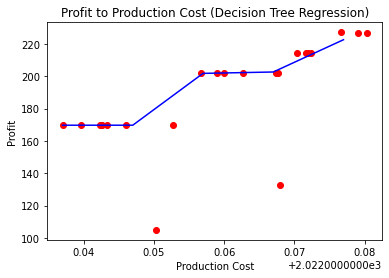

----------
Error Cuadratico del cluster 1 es 1790.1236227272727
El valor de r2 del cluster 1 es -0.9108016613173842


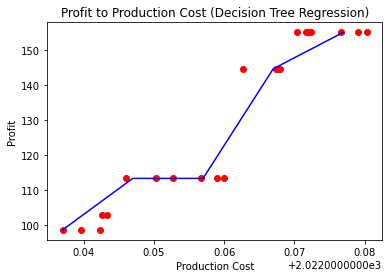

----------
Error Cuadratico del cluster 2 es 49.98852727272729
El valor de r2 del cluster 2 es 0.902346036874627


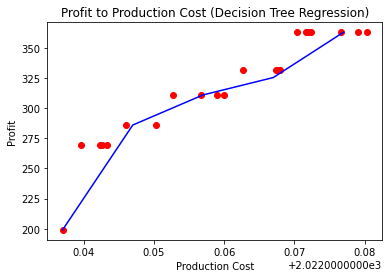

----------
Error Cuadratico del cluster 3 es 644.1409454545457
El valor de r2 del cluster 3 es 0.6519784129086115


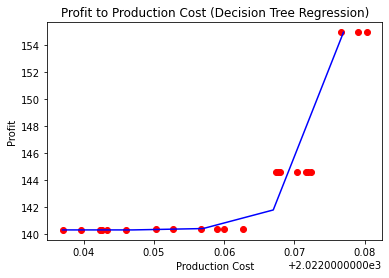

----------
Error Cuadratico del cluster 4 es 0.0004545454545451445
El valor de r2 del cluster 4 es 0.9999807778336968


In [18]:
analisis_completo(indice,data,6)

## REGRESSION TREE DEPTH=7

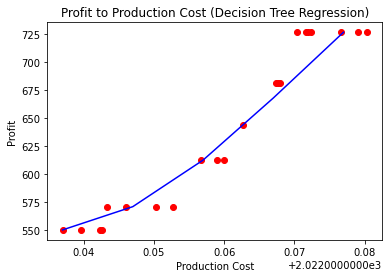

----------
Error Cuadratico del cluster 0 es 83.57818181818253
El valor de r2 del cluster 0 es 0.983529250114062


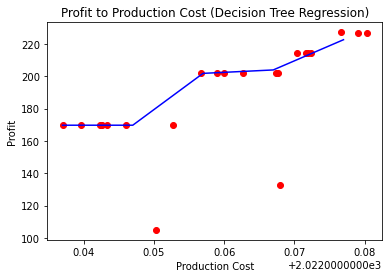

----------
Error Cuadratico del cluster 1 es 2273.662695454545
El valor de r2 del cluster 1 es -1.4269376710034054


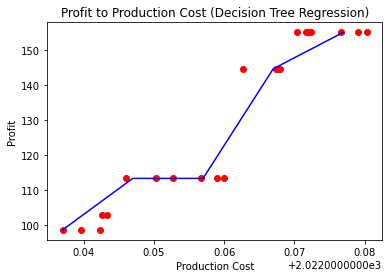

----------
Error Cuadratico del cluster 2 es 49.98852727272729
El valor de r2 del cluster 2 es 0.902346036874627


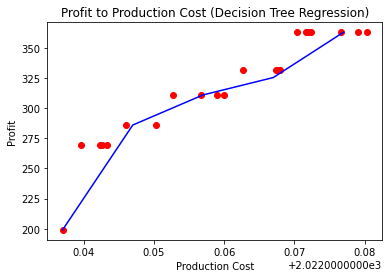

----------
Error Cuadratico del cluster 3 es 644.1409454545457
El valor de r2 del cluster 3 es 0.6519784129086115


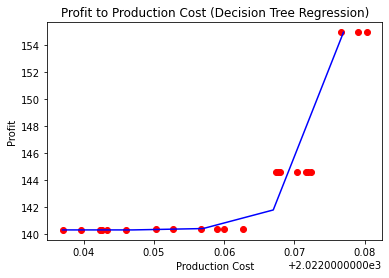

----------
Error Cuadratico del cluster 4 es 0.0004545454545451445
El valor de r2 del cluster 4 es 0.9999807778336968


In [19]:
analisis_completo(indice,data,7)